### Linear Regression Project


I’m thrilled to jump into this project with you. We’re going to analyze the customer data for the Ecommerce company based in New York City, which offers both online shopping and in-store personal styling sessions. Our goal is to determine whether they should prioritize enhancing their mobile app experience or their website. By examining metrics like user engagement, conversion rates, and customer feedback, we can make an informed recommendation on where to focus their resources. Let’s get started! Please provide the customer data so we can begin the analysis.


### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [9]:
df = pd.read_csv("Ecommerce Customers")

In [11]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploratory Data Analysis

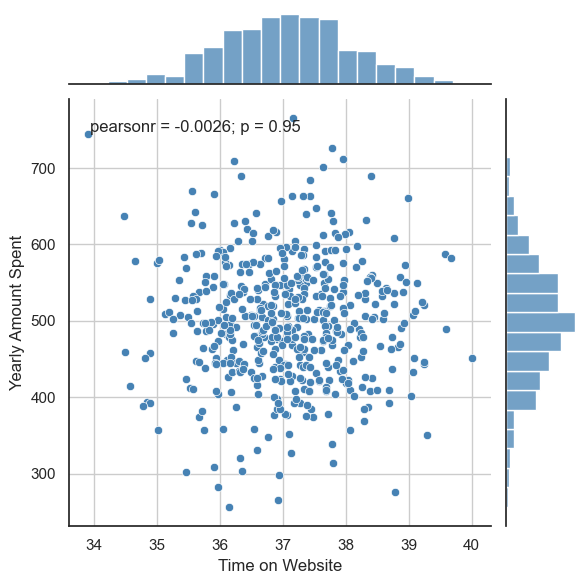

In [18]:
#create a jointplot to compare the Time on Website and Yearly Amount Spent columns.

# Scatterplot with marginal histograms
sns.set(style="white", palette="muted")

# Create the scatter plot
z = sns.jointplot(
    x="Time on Website", 
    y="Yearly Amount Spent", 
    data=df, 
    kind="scatter", 
    color="steelblue", 
    marginal_kws=dict(bins=20, fill=True)
)

# Calculate Pearson correlation and p-value
corr, p_value = stats.pearsonr(df['Time on Website'], df['Yearly Amount Spent'])

# Annotate the plot with correlation and p-value
z.ax_joint.text(0.05, 0.95, f"pearsonr = {corr:.4f}; p = {p_value:.2f}",
                transform=z.ax_joint.transAxes, 
                fontsize=12, 
                verticalalignment='top')

# Display the plot
plt.grid()
plt.show()


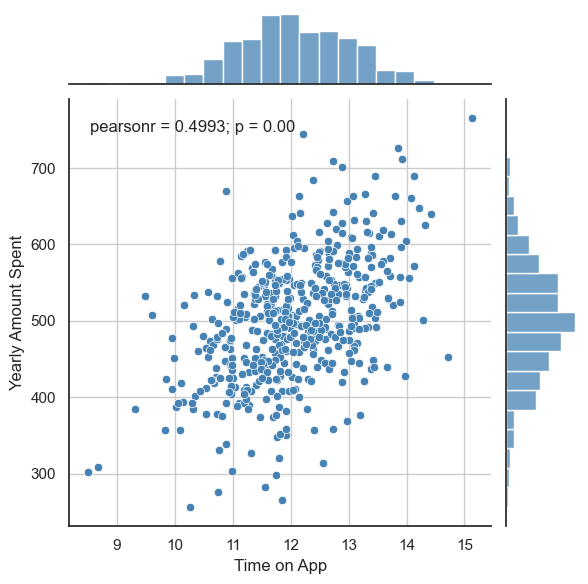

In [20]:
#create a jointplot to compare the Time on App and Yearly Amount Spent columns.


# Scatterplot with marginal histograms
sns.set(style="white", palette="muted")

# Create the scatter plot
z = sns.jointplot(
    x="Time on App", 
    y="Yearly Amount Spent", 
    data=df, 
    kind="scatter", 
    color="steelblue", 
    marginal_kws=dict(bins=20, fill=True)
)

# Calculate Pearson correlation and p-value
corr, p_value = stats.pearsonr(df['Time on App'], df['Yearly Amount Spent'])

# Annotate the plot with correlation and p-value
z.ax_joint.text(0.05, 0.95, f"pearsonr = {corr:.4f}; p = {p_value:.2f}",
                transform=z.ax_joint.transAxes, 
                fontsize=12, 
                verticalalignment='top')

# Display the plot
plt.grid()
plt.show()


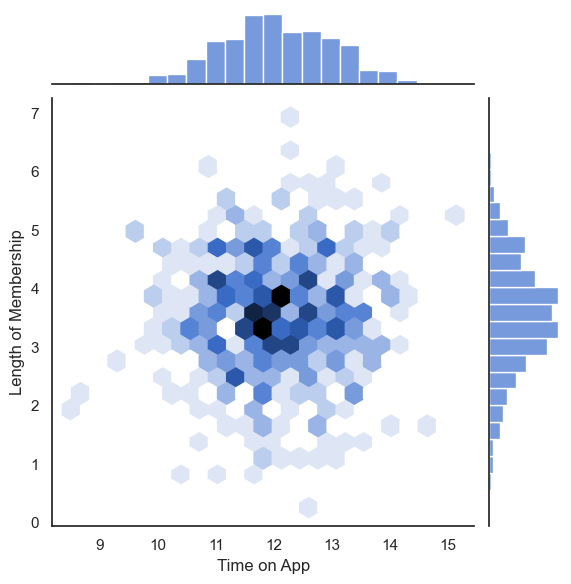

In [22]:
#Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

sns.jointplot(x='Time on App', y='Length of Membership', kind='hex', data=df)

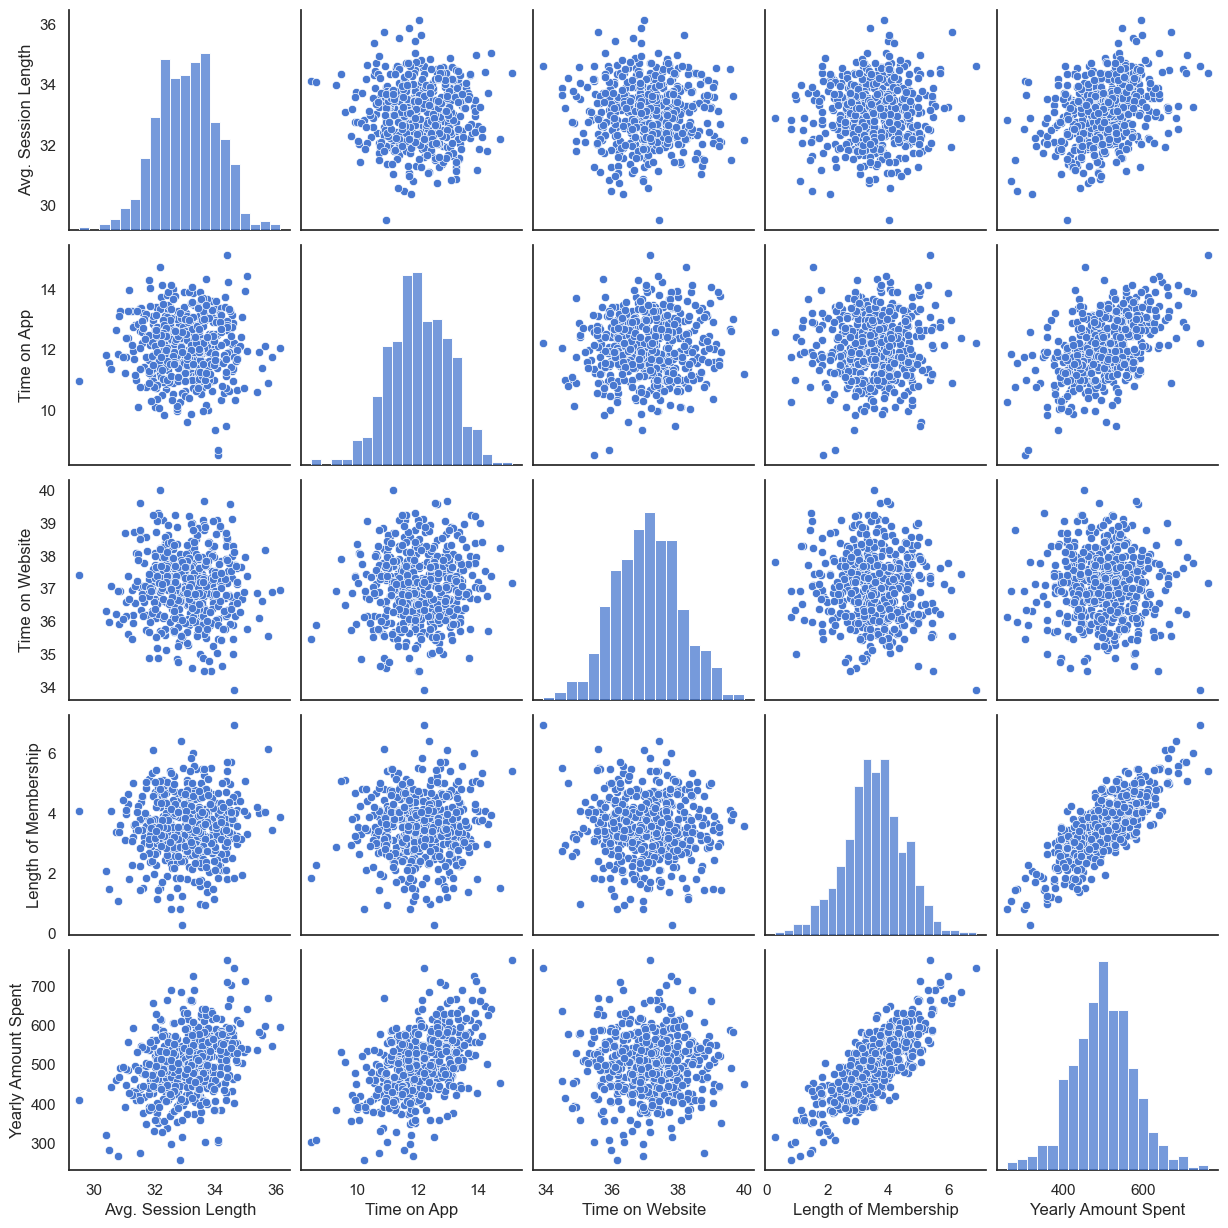

In [24]:
#create pairplot to explore these type of relationship across the entire data set.

sns.pairplot(df)

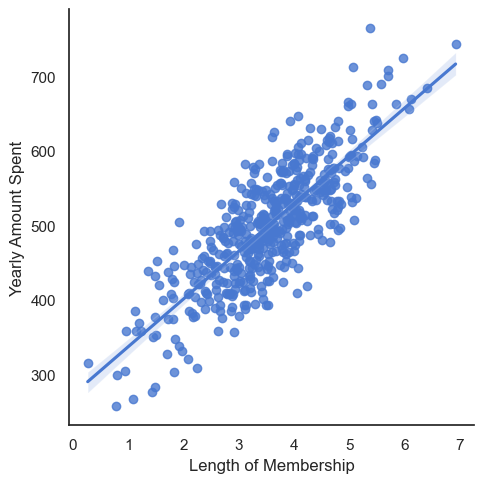

In [26]:
#Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. 

sns.lmplot(x ='Length of Membership', y = 'Yearly Amount Spent', data = df)


### Training and Testing Data:


In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X =df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [34]:
y= df['Yearly Amount Spent']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Training the Model:

In [39]:
from sklearn.linear_model import LinearRegression

**create an instance of a LinearRegression() model named lm**


In [43]:
lm = LinearRegression()

In [45]:
lm.fit(X_train, y_train)

LinearRegression()

**printout the coefficients of the model**

In [48]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [50]:
coef_df =pd.DataFrame(lm.coef_, X.columns, columns =['coefficient'])
coef_df

,coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Predicting Test Data

In [58]:
prediction =lm.predict(X_test)           #predicted value
prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [60]:
y_test           #actual value

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64

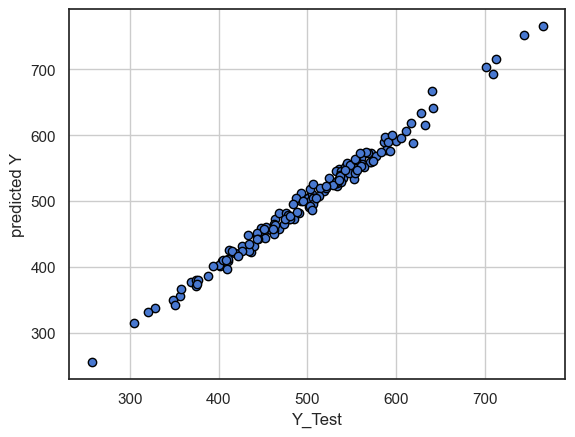

In [68]:
plt.scatter(y_test, prediction, edgecolor='black')
plt.xlabel('Y_Test')
plt.ylabel('predicted Y')
plt.grid()

### Evaluating the Model

In [73]:
# evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2).

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print("MSE:", metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.228148653430841
MSE: 79.8130516509744
RMSE 8.933815066978632


### Residuals

C:\Users\wwwmu\AppData\Local\Temp\ipykernel_10696\452988622.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction), bins =20);


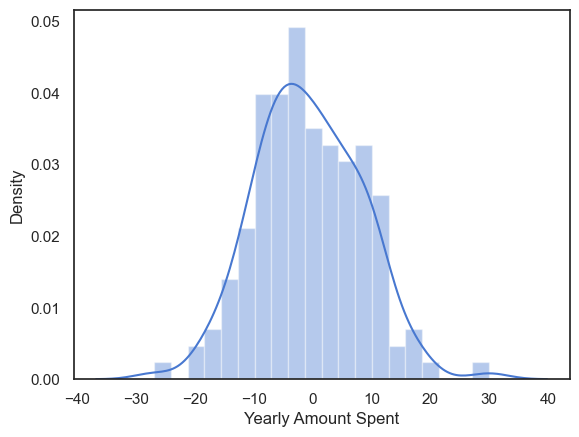

In [78]:
sns.distplot((y_test-prediction), bins =20);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [81]:
coef_df =pd.DataFrame(lm.coef_, X.columns, columns =['coefficient'])
coef_df

,coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### END